# Energy Management System

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys

# Run this cell only once to set the execution path in the main folder
os.chdir('..')
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


For the experiments concerning the EMS, you do not need to generate data but you can find them in the `data` folder.

In [2]:
import numpy as np
import tensorflow as tf
from helpers.utility import my_wrap_experiment
from usecases.ems.train_and_test_rl import train_rl_algo, test_rl_algo

c:\users\hp\documents\github\rl-offline-online-opt-experimental\venv\lib\site-packages\garage\experiment\deterministic.py:37: UserWarning: Enabeling deterministic mode in PyTorch can have a performance impact when using GPU.
  'Enabeling deterministic mode in PyTorch can have a performance '


In [3]:
# Randomly choose 100 instances over the 10000 available; if you set the seed to 0 then you will have the same instances used in
# our experimental evaluation
np.random.seed(0)
indexes = np.arange(10000, dtype=np.int32)
indexes = np.random.choice(indexes, size=100)

## Full end-to-end RL

In the following, we will train the end-to-end RL approach (`rl` in the paper). This is the baseline used in the **Constrained RL** experiments subsection.

In [4]:
# Logging directory where progress and models will be saved by the garage library
LOG_DIR = os.path.join('results', 'ems', 'models', 'pure-rl')
# "rl-mdp" means full end-to-end RL algorithm with sequential formulation of the environment
METHOD = 'rl-sequential'
# True if you want to use the safety layer; False otherwise
SAFETY_LAYER = False
# Default data paths
PREDICTIONS_FILEPATH = os.path.join('data', 'ems', 'Dataset10k.csv')
SHIFTS_FILEPATH = os.path.join('data', 'ems', 'optShift.npy')
PRICES_FILEPATH = os.path.join('data', 'ems', 'gmePrices.npy')

In [5]:
# Set the number of epochs and the batch size
EPOCHS = 52
BATCH_SIZE = 9600

Now let's train an agent for each instance.

In [6]:
for instance_idx in indexes:
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    run = my_wrap_experiment(train_rl_algo,
                             logging_dir=f'{LOG_DIR}_{instance_idx}',
                             snapshot_mode='last',
                             snapshot_gap=1,
                             archive_launch_repo=False)

    run(method=METHOD,
        test_split=[instance_idx],
        num_epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        noise_std_dev=0.01,
        safety_layer=SAFETY_LAYER,
        predictions_filepath=PREDICTIONS_FILEPATH,
        prices_filepath=PRICES_FILEPATH,
        shifts_filepath=SHIFTS_FILEPATH)

2023-03-28 16:18:11 | [train_rl_algo] Logging to results\ems\models\pure-rl_2732
Selected method: rl-sequential


C:\Users\HP\Documents\GitHub\rl-offline-online-opt-experimental\helpers\utility.py:520: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instances['PV(kW)'] = instances['PV(kW)'].map(lambda entry: entry[1:-1].split())
C:\Users\HP\Documents\GitHub\rl-offline-online-opt-experimental\helpers\utility.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instances['PV(kW)'] = instances['PV(kW)'].map(lambda entry: list(np.float_(entry)))
C:\Users\HP\Documents\GitHub\rl-offline-online-opt-experimental\helpers\utility

Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.
2023-03-28 16:18:13 | [train_rl_algo] Obtaining samples...
2023-03-28 16:18:26 | [train_rl_algo] epoch #0 | Optimizing policy...
2023-03-28 16:18:26 | [train_rl_algo] epoch #0 | Computing loss before
2023-03-28 16:18:27 | [train_rl_algo] epoch #0 | Computing KL before
2023-03-28 16:18:27 | [train_rl_algo] epoch #0 | Optimizing
Optimizing minibatches
2023-03-28 16:18:29 | [train_rl_algo] epoch #0 | Computing KL after
2023-03-28 16:18:29 | [train_rl_algo] epoch #0 | Computing loss after
2023-03-28 16:18:31 | [train_rl_algo] epoch #0 | Fitting baseline...
2023-03-28 16:18:33 | [train_rl_algo] epoch #0 | Saving snapshot...
0.005972623825073242
2023-03-28 16:18:33 | [train_rl_algo] epoch #0 | Saved
2023-03-28 16:18:33 | [train_rl_algo] epoch #0 | Time 19.65 s
2023-03-28 16:18:33 | [

KeyboardInterrupt: 

Finally, test each agent.

In [7]:
# Test trained agents

for idx in indexes:
    test_rl_algo(log_dir=f'{LOG_DIR}_{instance_idx}',
                 predictions_filepath=PREDICTIONS_FILEPATH,
                 shifts_filepath=SHIFTS_FILEPATH,
                 prices_filepath=PRICES_FILEPATH,
                 method=METHOD,
                 test_split=[idx],
                 num_episodes=1,
                 safety_layer=SAFETY_LAYER)


Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total reward: 10000.0

Total rewa

## RL + safety layer

In the following, we will train the end-to-end RL approach (`rl-safety-layer` in the paper). This is the SOTA method that was compared to `unify` in the **Constrained RL** experiments subsection.

In [15]:
# Logging directory where progress and models will be saved by the garage library
LOG_DIR = os.path.join('results', 'ems', 'models', 'rl-safety-layer')
# "rl-mdp" means full end-to-end RL algorithm with sequential formulation of the environment
METHOD = 'rl-sequential'
# True if you want to use the safety layer; False otherwise
SAFETY_LAYER = True
# Default data paths
PREDICTIONS_FILEPATH = os.path.join('data', 'ems', 'Dataset10k.csv')
SHIFTS_FILEPATH = os.path.join('data', 'ems', 'optShift.npy')
PRICES_FILEPATH = os.path.join('data', 'ems', 'gmePrices.npy')

In [16]:
# Set the number of epochs and the batch size
EPOCHS = 19
BATCH_SIZE = 9600

Now let's train an agent for each instance.

In [13]:
for instance_idx in indexes:
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    run = my_wrap_experiment(train_rl_algo,
                             logging_dir=os.path.join(LOG_DIR, f'mdp-env_{instance_idx}'),
                             snapshot_mode='last',
                             snapshot_gap=1,
                             archive_launch_repo=False)

    run(method=METHOD,
        test_split=[instance_idx],
        num_epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        noise_std_dev=0.01,
        safety_layer=SAFETY_LAYER,
        predictions_filepath=PREDICTIONS_FILEPATH,
        prices_filepath=PRICES_FILEPATH,
        shifts_filepath=SHIFTS_FILEPATH)

2023-03-28 16:24:44 | [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\rl-safety-layer\mdp-env_2732
2023-03-28 16:24:44 | [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\rl-safety-layer\mdp-env_2732
2023-03-28 16:24:44 | [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\rl-safety-layer\mdp-env_2732
Selected method: rl-sequential
2023-03-28 16:24:45 | [train_rl_algo] [train_rl_algo] [train_rl_algo] Obtaining samples...
2023-03-28 16:24:45 | [train_rl_algo] [train_rl_algo] [train_rl_algo] Obtaining samples...
2023-03-28 16:24:45 | [train_rl_algo] [train_rl_algo] [train_rl_algo] Obtaining samples...
Academic license - for non-commercial use only - expires 2023-06-04
Using license file C:\Users\HP\gurobi.lic
2023-03-28 16:25:14 | [train_rl_algo] [train_rl_algo] [train_rl_algo] epoch #0 | Optimizing policy...
2023-03-28 16:25:14 | [train_rl_algo] [train_rl_algo] [train_rl_algo] epoch #0 | Opti

KeyboardInterrupt: 

Finally, test each agent.

In [17]:
# Test trained agents

for idx in indexes:
    test_rl_algo(log_dir=os.path.join(LOG_DIR, f'mdp-env_{idx}'),
                 predictions_filepath=PREDICTIONS_FILEPATH,
                 shifts_filepath=SHIFTS_FILEPATH,
                 prices_filepath=PRICES_FILEPATH,
                 method=METHOD,
                 test_split=[idx],
                 num_episodes=1,
                 safety_layer=SAFETY_LAYER)


Total reward: 661.720346056467

Total reward: 912.2783660564663

Total reward: 2205.034407056467

Total reward: 1402.333794056466

Total reward: 816.5014770564665

Total reward: 1023.4033870564664

Total reward: 1049.566369076458

Total reward: 848.9504792401319

Total reward: 1028.6935805799812

Total reward: 998.566377849697

Total reward: 1272.272479099135

Total reward: 1241.5294750564663

Total reward: 740.8724910564664

Total reward: 998.5115983625062

Total reward: 991.491757056466

Total reward: 1155.2671990564668

Total reward: 1054.7751560564664

Total reward: 1241.1833049532647

Total reward: 1078.5195880564668

Total reward: 1768.039788056467

Total reward: 924.4038360564665

Total reward: 573.4224140564666

Total reward: 1401.9798364381832

Total reward: 1212.3441380564664

Total reward: 1502.2626850564666

Total reward: 1292.8968824360268

Total reward: 1279.1234326074612

Total reward: 919.7658150564665

Total reward: 1029.4116799299707

Total reward: 654.5403730564666


## Offline/online integration using UNIFY - sequential formulation

In the following, we will show how UNIFY can be used for tuning virtual parameters of an optimization problem.

In [23]:
# Logging directory where progress and models will be saved by the garage library
LOG_DIR = os.path.join('results', 'ems', 'models', 'hybrid-rl-opt', 'sequential')
# "rl-mdp" means full end-to-end RL algorithm with sequential formulation of the environment
METHOD = 'unify-sequential'
# True if you want to use the safety layer; False otherwise
SAFETY_LAYER = False
# Default data paths
PREDICTIONS_FILEPATH = os.path.join('data', 'ems', 'Dataset10k.csv')
SHIFTS_FILEPATH = os.path.join('data', 'ems', 'optShift.npy')
PRICES_FILEPATH = os.path.join('data', 'ems', 'gmePrices.npy')

In [19]:
# Set the number of epochs and the batch size
EPOCHS = 19
BATCH_SIZE = 9600

Train an agent for each instance.

In [20]:
for instance_idx in indexes:
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    run = my_wrap_experiment(train_rl_algo,
                             logging_dir=os.path.join(LOG_DIR, f'mdp-env_{instance_idx}'),
                             snapshot_mode='last',
                             snapshot_gap=1,
                             archive_launch_repo=False)

    run(method=METHOD,
        test_split=[instance_idx],
        num_epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        noise_std_dev=0.01,
        safety_layer=SAFETY_LAYER,
        predictions_filepath=PREDICTIONS_FILEPATH,
        prices_filepath=PRICES_FILEPATH,
        shifts_filepath=SHIFTS_FILEPATH)

2023-03-28 16:31:11 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\mdp-env_2732
2023-03-28 16:31:11 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\mdp-env_2732
2023-03-28 16:31:11 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\mdp-env_2732
2023-03-28 16:31:11 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\mdp-env_2732
Selected method: unify-sequential
2023-03-28 16:31:12 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Obtaining samples...
2023-03-28 16:31:12 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Obtaining samples...
2023-03-28 16:31:12 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Obtaining samples...
2023-03-28 16:31:12 | [train_rl_algo] [train_rl_algo] [tr

KeyboardInterrupt: 

Finally, test each agent.

In [26]:
# Test trained agents

for idx in indexes:
    test_rl_algo(log_dir=os.path.join(LOG_DIR, f'mdp-env_{idx}'),
                 predictions_filepath=PREDICTIONS_FILEPATH,
                 shifts_filepath=SHIFTS_FILEPATH,
                 prices_filepath=PRICES_FILEPATH,
                 method=METHOD,
                 test_split=[idx],
                 num_episodes=1,
                 safety_layer=SAFETY_LAYER)


Total reward: 586.3493481248358

Total reward: 840.4512552381422

Total reward: 2060.137576205352

Total reward: 1266.3690647338885

Total reward: 727.5698475397031

Total reward: 922.1211520813189

Total reward: 952.8401948903783

Total reward: 767.7824470087392

Total reward: 942.5939764059868

Total reward: 915.4909210498483

Total reward: 1195.5089348907125

Total reward: 1153.5980107631938

Total reward: 647.6318446408183

Total reward: 915.4909210498483

Total reward: 917.8215137116761

Total reward: 1082.1223664529327

Total reward: 956.9323069069065

Total reward: 1138.5456316227142

Total reward: 993.3869941256772

Total reward: 1678.2635433659257

Total reward: 842.0698576810559

Total reward: 500.9083208391666

Total reward: 1302.988699385395

Total reward: 1122.223553143825

Total reward: 1402.3300860174838

Total reward: 1192.1928199837162

Total reward: 1153.5980107631938

Total reward: 828.6206943868514

Total reward: 922.1211520813189

Total reward: 583.7721996181627



## Offline/online integration using UNIFY - all-at-once formulation

In [34]:
# Logging directory where progress and models will be saved by the garage library
LOG_DIR = os.path.join('results', 'ems', 'models', 'hybrid-rl-opt', 'single-step')
# "rl-mdp" means full end-to-end RL algorithm with sequential formulation of the environment
METHOD = 'unify-all-at-once'
# True if you want to use the safety layer; False otherwise
SAFETY_LAYER = False
# Default data paths
PREDICTIONS_FILEPATH = os.path.join('data', 'ems', 'Dataset10k.csv')
SHIFTS_FILEPATH = os.path.join('data', 'ems', 'optShift.npy')
PRICES_FILEPATH = os.path.join('data', 'ems', 'gmePrices.npy')

In [32]:
# Set the number of epochs and the batch size
EPOCHS = 37
BATCH_SIZE = 100

Train an agent for each instance.

In [33]:
for instance_idx in indexes:
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    run = my_wrap_experiment(train_rl_algo,
                             logging_dir=os.path.join(LOG_DIR, f'single-step-env_{instance_idx}'),
                             snapshot_mode='last',
                             snapshot_gap=1,
                             archive_launch_repo=False)

    run(method=METHOD,
        test_split=[instance_idx],
        num_epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        noise_std_dev=0.01,
        safety_layer=SAFETY_LAYER,
        predictions_filepath=PREDICTIONS_FILEPATH,
        prices_filepath=PRICES_FILEPATH,
        shifts_filepath=SHIFTS_FILEPATH)

2023-03-28 16:41:09 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\single-step\single-step-env_2732
2023-03-28 16:41:09 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\single-step\single-step-env_2732
2023-03-28 16:41:09 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\single-step\single-step-env_2732
2023-03-28 16:41:09 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\single-step\single-step-env_2732
2023-03-28 16:41:09 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] Logging to tmp\results\ems\models\hybrid-rl-opt\single-step\single-step-env_2732
2023-

2023-03-28 16:41:21 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] epoch #0 | Saving snapshot...
2023-03-28 16:41:21 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] epoch #0 | Saving snapshot...
2023-03-28 16:41:21 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] epoch #0 | Saving snapshot...
2023-03-28 16:41:21 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] epoch #0 | Saving snapshot...
2023-03-28 16:41:21 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] epoch #0 | Saving snapshot...
2023-03-28 16:41:21 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] epoch #0 | Saving snapshot...
0.003130674362182617
2023-03-28 16:41:21 | [train_rl_algo] [train_rl_algo] [train_rl_algo] [train_rl_algo] [trai

KeyboardInterrupt: 

Finally, test each agent.

In [35]:
# Test trained agents

for idx in indexes:
    test_rl_algo(log_dir=os.path.join(LOG_DIR, f'single-step-env_{idx}'),
                 predictions_filepath=PREDICTIONS_FILEPATH,
                 shifts_filepath=SHIFTS_FILEPATH,
                 prices_filepath=PRICES_FILEPATH,
                 method=METHOD,
                 test_split=[idx],
                 num_episodes=1,
                 safety_layer=SAFETY_LAYER)


Total reward: 580.0731083458397

Total reward: 834.5464198391664

Total reward: 2052.3775762053524

Total reward: 1259.639064733889

Total reward: 720.6878475397028

Total reward: 915.6332150978335

Total reward: 946.3401948903786

Total reward: 760.9566768391667

Total reward: 936.3881467535568

Total reward: 909.0595144783588

Total reward: 1188.7789348907122

Total reward: 1145.732579191704

Total reward: 640.7058336546863

Total reward: 908.5815144783584

Total reward: 912.3384604258734

Total reward: 1076.7883664529327

Total reward: 949.7902545593366

Total reward: 1130.455358631349

Total reward: 988.1589941256773

Total reward: 1670.7839912078146

Total reward: 835.1878576810557

Total reward: 495.7443208391666

Total reward: 1295.7664809413945

Total reward: 1115.4565503949855

Total reward: 1395.124720869528

Total reward: 1184.1228199837158

Total reward: 1145.6500107631937

Total reward: 822.6573800765611

Total reward: 915.691729509829

Total reward: 578.5867118391664

To

## Visualize results

In the following, we will show to plot the figures shown in the paper.

### Figure 4 
Optimality gap of the state-of-the-art TUNING approach and the UNIFY methods w.r.t. the
computational time.

In [36]:
from usecases.ems.plotting import compute_mean_epoch_duration, cost_over_time


First of all compute the mean epoch duration for each method.

In [37]:
compute_mean_epoch_duration(log_dir=os.path.join('results', 'ems', 'models', 'pure-rl'))
compute_mean_epoch_duration(log_dir=os.path.join('results', 'ems', 'models', 'rl-safety-layer'))
compute_mean_epoch_duration(log_dir=os.path.join('results', 'ems', 'models', 'hybrid-rl-opt', 'single-step'))
compute_mean_epoch_duration(log_dir=os.path.join('results', 'ems', 'models', 'hybrid-rl-opt', 'sequential'))

Then move the training durations in the same directory.

The following file are expected to be in the same directory: 
- `single-step.npy`
- `mdp.npy`
- `rl-safety-layer`
- `rl.npy`

We also expect the following directory hierachy:
- the base directory is called `results/ems/models/`
- a `pure-rl` subdirectory where there are all the agents, one for each instance, each of them saved in a directory called `mdp-env_{instance-index}`.
- a `rl-safety-layer` subdirectory where there are all the agents, one for each instance, each of them saved in a directory called `mdp-env_{instance-index}`.
- a `hybrid-rl-opt/sequential` subdirectory where there are all the agents, one for each instance, each of them saved in a directory called `mdp-env_{instance-index}`.
- a `hybrid-rl-opt/single-step` subdirectory where there are all the agents, one for each instance, each of them saved in a directory called `single-step-env_{instance-index}`.

[Epoch duration] - Single step: 9.8597425 | MDP: 19.28175 | RL: 7.051808458920759 | RL safety layer: 19.163145
[Training end] - Single step: 384.52995749999997 | MDP: 366.35325 | RL: 698.1290374331551| RL safety layer: 747.362655
[Epochs] - Single step: 37.15647239266137 | MDP: 19.0 | RL: 51.951673408904306| RL safety: 19.11759525902455


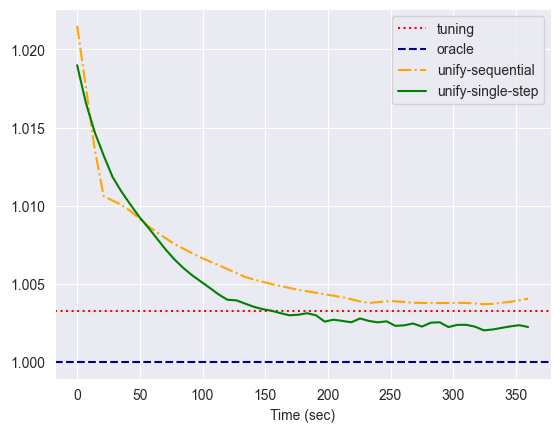

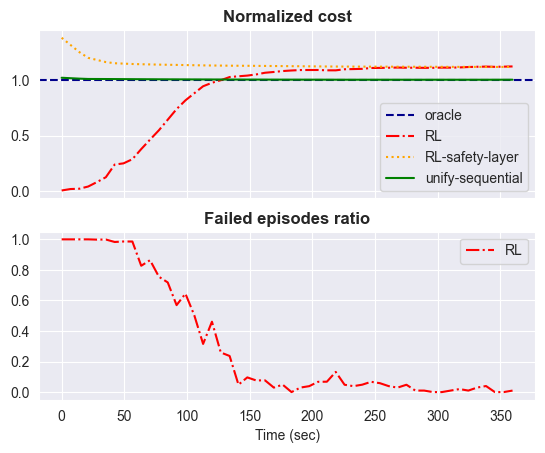

In [43]:
cost_over_time(acronym='unify',
               indexes=indexes,
               # where the file mentioned in the cell above are
               durations_filepath=os.path.join('results', 'ems', 'training-durations'),
               # the directory with all the model and progress files
               models_filepath=os.path.join('results', 'ems', 'models'))